In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [211]:
data = pd.read_csv('https://storage.googleapis.com/data-ia/data.csv')
data.drop(['ID'], axis=1, inplace=True)
target = 'Status'

In [140]:
data.describe()

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       14

In [213]:
data['loan_limit'] = data['loan_limit'].map({ 'cf': 1, 'ncf': 2, 'nan': 0 })


In [214]:
data['Gender'] = data['Gender'].map({ 'Male': 1, 'Female': 2, 'Joint': 3, 'Sex Not Available': 4 })

In [215]:
data['approv_in_adv'] = data['approv_in_adv'].map({ 'nopre': 1, 'pre': 2, 'nan': 0 })

In [216]:
data['loan_type'] = data['loan_type'].map({ 'type1': 1, 'type2': 2, 'type3': 3 })

In [217]:
data['loan_purpose'] = data['loan_purpose'].map({ 'p1': 1, 'p2': 2, 'p3': 3, 'p4': 4, 'nan': 0 })

In [218]:
data['Credit_Worthiness'] = data['Credit_Worthiness'].map({ 'l1': 1, 'l2': 2 })

In [219]:
data['open_credit'] = data['open_credit'].map({ 'nopc': 0, 'opc': 1 })

In [220]:
data['business_or_commercial'] = data['business_or_commercial'].map({ 'nob/c': 0, 'b/c': 1 })

In [221]:
data['Neg_ammortization'] = data['Neg_ammortization'].map({ 'not_neg': 1, 'neg_amm': 2, 'nan': 0 })

In [222]:
data['interest_only'] = data['interest_only'].map({ 'not_int': 0, 'int_only': 1 })

In [223]:
data['lump_sum_payment'] = data['lump_sum_payment'].map({ 'not_lpsm': 0, 'lpsm': 1 })

In [224]:
data['construction_type'] = data['construction_type'].map({ 'sb': 0, 'mh': 1 })

In [225]:
data['occupancy_type'] = data['occupancy_type'].map({ 'pr': 0, 'ir': 1, 'sr': 2 })

In [226]:
data['Secured_by'] = data['Secured_by'].map({ 'land': 0, 'home': 1 })

In [227]:
data['total_units'] = data['total_units'].map({ '1U': 1, '2U': 2, '3U': 3, '4U': 4 })

In [228]:
data['credit_type'] = data['credit_type'].map({ 'EQUI': 1, 'CRIF': 2, 'CIB': 3, 'EXP': 4 })

In [229]:
data['co_applicant_credit_type'] = data['co_applicant_credit_type'].map({ 'EXP': 1, 'CIB': 0 })

In [230]:
data['age'] = data['age'].map({ '<25': 1, 'nan': 0, '25-34': 2, '35-44': 3, '45-54': 4, '55-64': 5, '65-74': 6, '>74': 7 })

In [231]:
data['submission_of_application'] = data['submission_of_application'].map({ 'to_inst': 1, 'not_inst': 2, 'nan': 0 })

In [232]:
data['Region'] = data['Region'].map({ 'North': 1, 'central': 0, 'south': 2, 'North-East': 3 })

In [233]:
data['Security_Type'] = data['Security_Type'].map({ 'Indriect': 0, 'direct': 1 })

In [234]:
data.isnull().sum()

year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co_applicant_credit_type         0
age                            200
submission_of_application      200
LTV                 

In [204]:
correlation = data.corr(numeric_only = True)['Status']
correlation

year                             NaN
loan_limit                  0.054262
Gender                      0.000646
approv_in_adv              -0.037396
loan_type                   0.052301
loan_purpose               -0.027910
Credit_Worthiness           0.034875
open_credit                -0.009979
business_or_commercial      0.092550
loan_amount                -0.036825
rate_of_interest            0.022957
Interest_rate_spread             NaN
Upfront_charges            -0.019138
term                       -0.000240
Neg_ammortization           0.155920
interest_only               0.013881
lump_sum_payment            0.187752
property_value             -0.048864
occupancy_type              0.024167
Secured_by                 -0.026055
total_units                 0.023800
income                     -0.065119
credit_type                -0.370283
Credit_Score                0.004004
co_applicant_credit_type    0.144239
age                         0.044600
LTV                         0.038895
R

,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,income,credit_type,Credit_Score,co_applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_limit,NaN,1.000000,0.014736,0.096445,0.044775,-0.037391,-0.024095,0.018208,-0.022574,0.281016,...,0.147994,-0.023047,0.000432,0.041043,-0.002515,0.013964,0.002376,0.004092,0.054262,0.001153
Gender,NaN,0.014736,1.000000,-0.001926,0.008747,0.047630,0.001374,0.017593,0.000353,-0.015723,...,0.031255,-0.001721,0.002678,0.384524,0.094442,-0.021626,0.404633,0.004512,0.000646,-0.021276
approv_in_adv,NaN,0.096445,-0.001926,1.000000,-0.004281,-0.147067,-0.061770,-0.005979,0.010112,-0.030081,...,-0.013734,0.010237,-0.001185,-0.011839,-0.027439,0.032632,-0.006149,0.001456,-0.037396,0.014197
loan_type,NaN,0.044775,0.008747,-0.004281,1.000000,0.019613,-0.011153,-0.031869,0.410676,-0.072201,...,-0.145614,0.023624,-0.004336,0.031215,0.061912,0.172478,-0.039081,-0.006152,0.052301,0.178330
loan_purpose,NaN,-0.037391,0.047630,-0.147067,0.019613,1.000000,-0.040168,-0.002447,-0.055685,0.066688,...,0.007544,0.047119,0.000841,-0.004835,0.133198,-0.111115,0.064799,0.005178,-0.027910,-0.082198
Credit_Worthiness,NaN,-0.024095,0.001374,-0.061770,-0.011153,-0.040168,1.000000,0.230578,0.002938,-0.014207,...,0.016298,-0.015552,0.001375,0.013758,0.004852,-0.014255,-0.002295,-0.003570,0.034875,0.014789
open_credit,NaN,0.018208,0.017593,-0.005979,-0.031869,-0.002447,0.230578,1.000000,-0.024685,-0.044147,...,0.047405,-0.004093,0.001930,0.016797,0.039842,-0.083533,-0.001288,0.000913,-0.009979,-0.010943
business_or_commercial,NaN,-0.022574,0.000353,0.010112,0.410676,-0.055685,0.002938,-0.024685,1.000000,-0.162498,...,-0.141532,-0.001418,-0.000780,-0.023249,-0.075474,0.137961,-0.033197,-0.007023,0.092550,0.175462
loan_amount,NaN,0.281016,-0.015723,-0.030081,-0.072201,0.066688,-0.014207,-0.044147,-0.162498,1.000000,...,0.456065,-0.003416,0.004438,0.147668,-0.182999,0.038869,0.009384,0.009949,-0.036825,0.015029


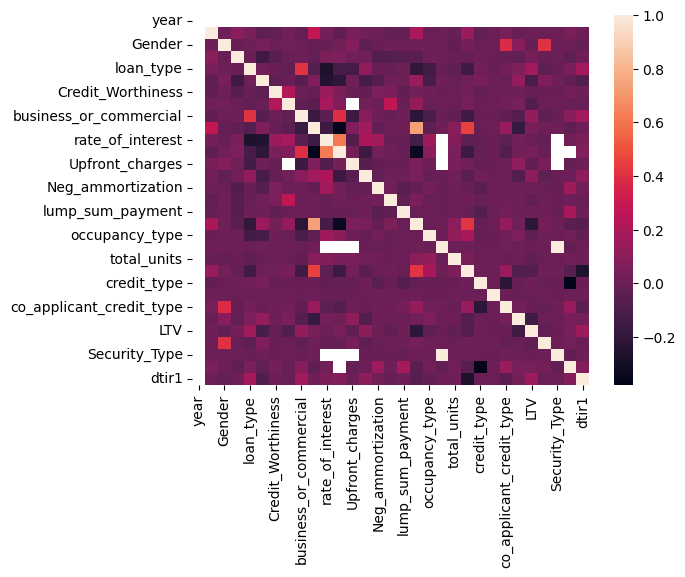

In [210]:
sb.heatmap(data.corr(numeric_only = True)) 
data.corr(numeric_only = True)

<AxesSubplot: >

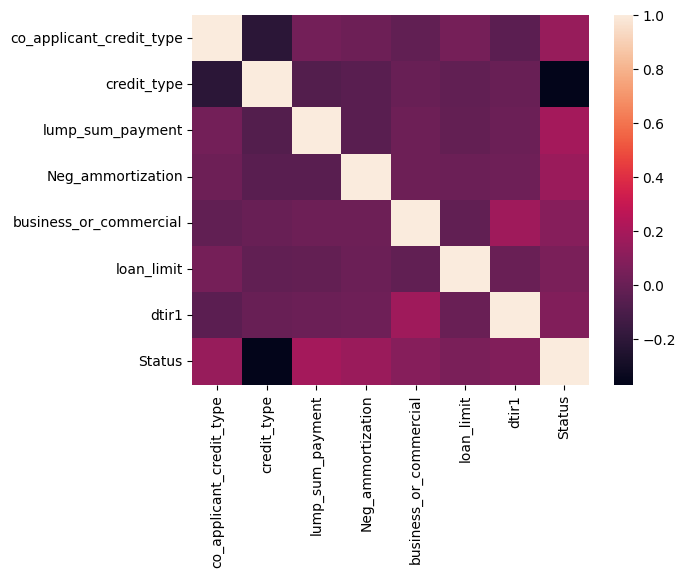

In [237]:
toModel = data[['co_applicant_credit_type', 'credit_type', 'lump_sum_payment', 'Neg_ammortization', 'business_or_commercial', 'loan_limit', 'dtir1', 'Status']]
sb.heatmap(toModel.corr(numeric_only = True)) 
